In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
df = pd.read_csv('data/cleanedData_v2.csv')

In [14]:
sumOfDataGroupedByYear = df.groupby('year').sum()

sumOfDataGroupedByYear['gdp_per_capita'] = sumOfDataGroupedByYear['gdp'] / sumOfDataGroupedByYear['population']
sumOfDataGroupedByYear['greenhouse_gas_emissions_per_capita'] = sumOfDataGroupedByYear['greenhouse_gas_emissions'] / sumOfDataGroupedByYear['population']
sumOfDataGroupedByYear['renewables_consumption_per_capita'] = sumOfDataGroupedByYear['renewables_consumption'] / sumOfDataGroupedByYear['population']


In [15]:
not_to_remove = [ 'year', 'oil_prod_per_capita', 'gas_prod_per_capita', 'coal_prod_per_capita', 'gdp_per_capita', 'renewables_consumption_per_capita', 'greenhouse_gas_emissions_per_capita']
sumOfDataGroupedByYear = sumOfDataGroupedByYear.drop(columns=[col for col in df.columns if (col not in not_to_remove)])
sumOfDataGroupedByYear = sumOfDataGroupedByYear.dropna()
sumOfDataGroupedByYear['years'] = sumOfDataGroupedByYear.index

      coal_prod_per_capita  gas_prod_per_capita  oil_prod_per_capita  years  \
year                                                                          
1965            256012.697           198486.998          7125709.175   1965   
1966            251753.946           202573.372          7581420.190   1966   
1967            244320.371           235157.217          7555583.077   1967   
1968            248126.078           323052.145          8001727.298   1968   
1969            245004.931           373678.698          8068370.880   1969   
1970            251783.550           320901.212          8062709.428   1970   
1971            243706.228           354341.644          8247094.741   1971   
1972            246025.942           389093.240          8103490.321   1972   
1973            248481.814           454815.941          8340552.291   1973   
1974            243479.829           441108.238          7427169.754   1974   
1975            257641.216           472906.964     

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


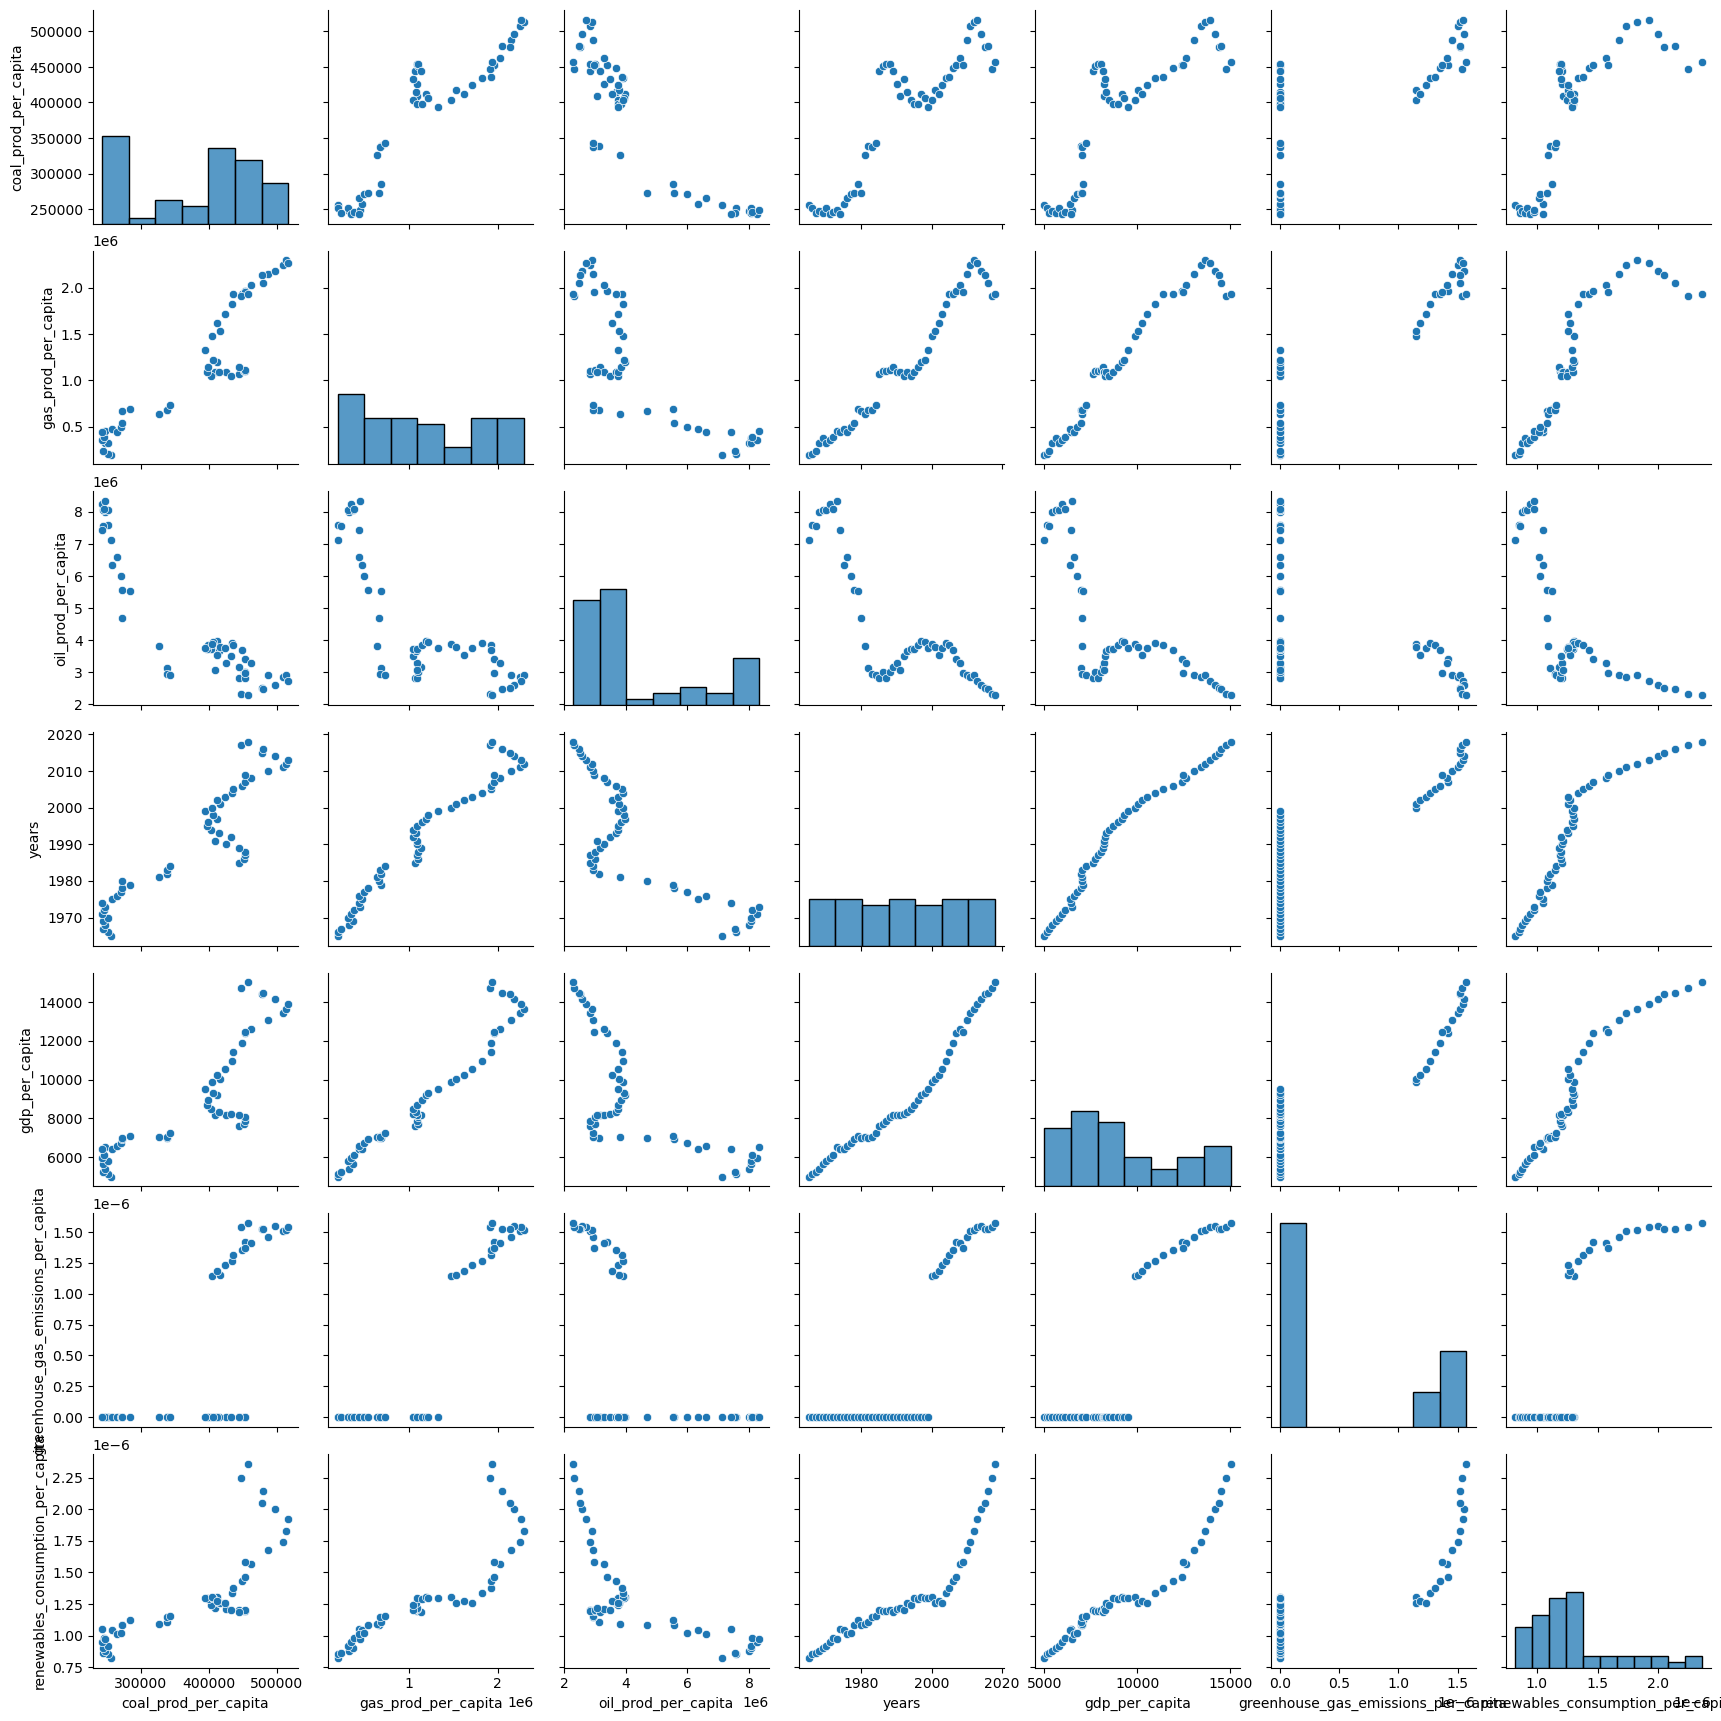

In [16]:
sns.pairplot(sumOfDataGroupedByYear)

<Axes: >

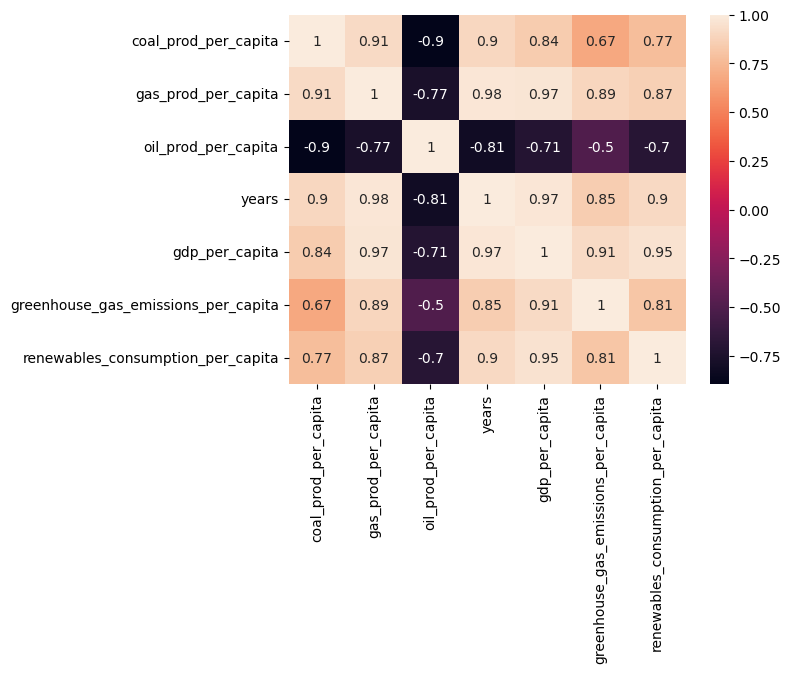

In [17]:
sns.heatmap(sumOfDataGroupedByYear.corr(), annot=True)

In [18]:
YS = [sumOfDataGroupedByYear['oil_prod_per_capita'], sumOfDataGroupedByYear['coal_prod_per_capita'], sumOfDataGroupedByYear['gas_prod_per_capita']]
X = sumOfDataGroupedByYear['years']
X = sm.add_constant(X)

In [19]:
modeloil = sm.OLS(YS[0], X).fit()
# Print model summary
print(modeloil.summary())

                             OLS Regression Results                            
Dep. Variable:     oil_prod_per_capita   R-squared:                       0.657
Model:                             OLS   Adj. R-squared:                  0.651
Method:                  Least Squares   F-statistic:                     99.79
Date:                 Thu, 30 Nov 2023   Prob (F-statistic):           1.08e-13
Time:                         12:25:54   Log-Likelihood:                -828.25
No. Observations:                   54   AIC:                             1660.
Df Residuals:                       52   BIC:                             1664.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.007e+08   1.97e+07     10.21

In [20]:
modelcoal = sm.OLS(YS[1], X).fit()
# Print model summary
print(modelcoal.summary())

                             OLS Regression Results                             
Dep. Variable:     coal_prod_per_capita   R-squared:                       0.815
Model:                              OLS   Adj. R-squared:                  0.811
Method:                   Least Squares   F-statistic:                     229.1
Date:                  Thu, 30 Nov 2023   Prob (F-statistic):           1.07e-20
Time:                          12:25:54   Log-Likelihood:                -646.57
No. Observations:                    54   AIC:                             1297.
Df Residuals:                        52   BIC:                             1301.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.906e+06    6.8e+05

In [21]:
modelgas = sm.OLS(YS[2], X).fit()
# Print model summary
print(modelgas.summary())

                             OLS Regression Results                            
Dep. Variable:     gas_prod_per_capita   R-squared:                       0.951
Model:                             OLS   Adj. R-squared:                  0.950
Method:                  Least Squares   F-statistic:                     1002.
Date:                 Thu, 30 Nov 2023   Prob (F-statistic):           1.18e-35
Time:                         12:25:54   Log-Likelihood:                -718.73
No. Observations:                   54   AIC:                             1441.
Df Residuals:                       52   BIC:                             1445.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.069e+07   2.59e+06    -31.20

In [22]:
modelRen = sm.OLS( sumOfDataGroupedByYear['renewables_consumption_per_capita'],X).fit()
# Print model summary
print(modelRen.summary())

                                    OLS Regression Results                                   
Dep. Variable:     renewables_consumption_per_capita   R-squared:                       0.818
Model:                                           OLS   Adj. R-squared:                  0.814
Method:                                Least Squares   F-statistic:                     233.3
Date:                               Thu, 30 Nov 2023   Prob (F-statistic):           7.25e-21
Time:                                       12:25:54   Log-Likelihood:                 770.37
No. Observations:                                 54   AIC:                            -1537.
Df Residuals:                                     52   BIC:                            -1533.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

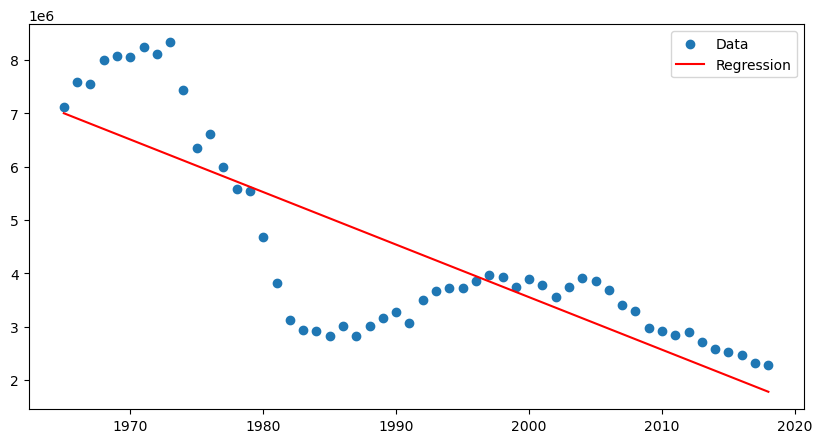

In [23]:
predicted_values = modeloil.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['oil_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()

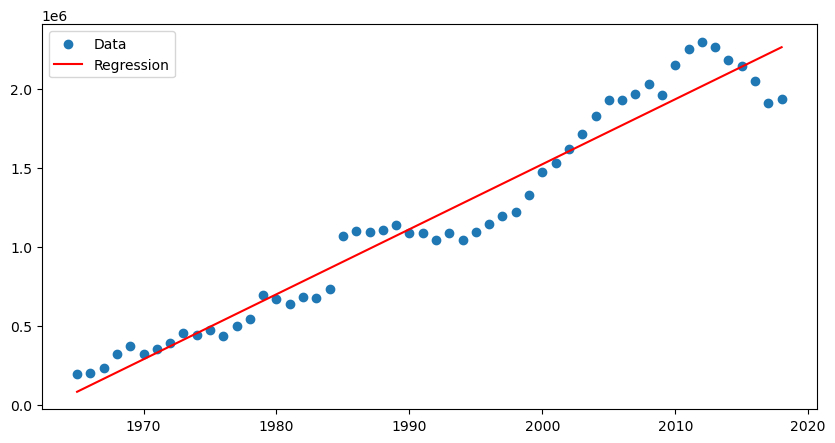

In [24]:
predicted_values = modelgas.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['gas_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()

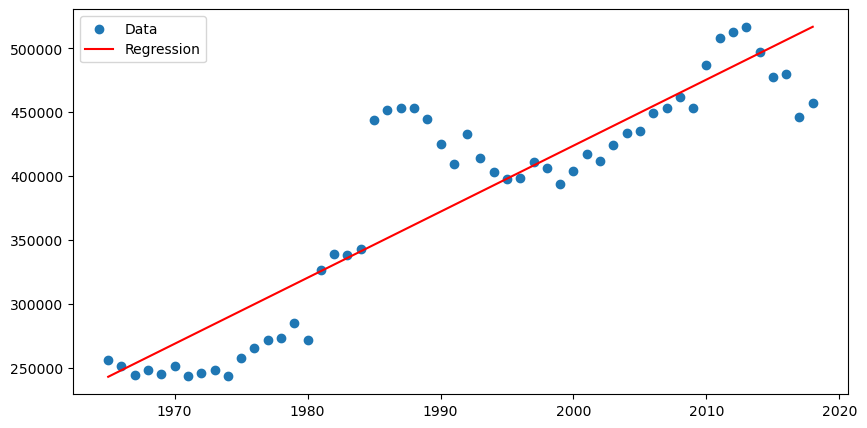

In [25]:
predicted_values = modelcoal.predict(X)

# Plot the original data and the regression curve
plt.figure(figsize=(10, 5))
plt.scatter(sumOfDataGroupedByYear['years'], sumOfDataGroupedByYear['coal_prod_per_capita'], label='Data')
plt.plot(sumOfDataGroupedByYear['years'], predicted_values, color='red', label='Regression')
plt.legend()
plt.show()